In [1]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import cv2
from pydicom.pixel_data_handlers import apply_windowing

<div class='alert alert-info' style='text-align:center'><h1>Why use windowing?</h1>
- yet another DICOM processing notebook -</div>

### Get better quality image exports .. view images as they were intended to be viewed!

##### DICOM images routinely contain values greater than 8 bits (255). 
#####  Normalizing the entire (non 8-bit) range down to 8 bit results in the loss of information.
##### "Windowing" allows us to select a range of pixels from the original image **before** normalization.

##### This has the effect of giving much greater contrast between soft and dense tissues.

- Don't forget to install GDCM and pylibjpeg for the JPG compressed DICOM files in this dataset.

In [2]:
# This function extracts pixels from a DICOM file and uses stantard normalization to crunch the image down to 8 bit.

def get_pixels(dcm_file):
    im = pydicom.dcmread(dcm_file)
    
    data = im.pixel_array
    
    if im.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    else:
        data = data - np.min(data)
        
    if np.max(data) != 0:
        data = data / np.max(data)
    data=(data * 255).astype(np.uint8)

    return data

In [3]:
# This function uses pydicom's apply_windowing() function to apply the default window width and level specified in the DICOM tags

def get_pixels_with_windowing(dcm_file):
    im = pydicom.dcmread(dcm_file)
    
    data = im.pixel_array
    
    # This line is the only difference in the two functions
    data = apply_windowing(data, im)
    
    if im.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    else:
        data = data - np.min(data)
        
    if np.max(data) != 0:
        data = data / np.max(data)
    data=(data * 255).astype(np.uint8)

    return data

#### The apply_windowing() function from pydicom uses the DICOM WindowWidth and WindowLevel tags to apply the specified "Window" to the image. 

#### You can also use apply_voi_lut() here. Since there aren't any VOI LUTs in this dataset, it reverts back to using the default WW/WL tags.

In [4]:
# Open an image and get the pixels twice .. once without windowing and once with it.
#
file = "/kaggle/input/rsna-breast-cancer-detection/train_images/10025/562340703.dcm"
pixels = get_pixels(file)
pixels_with_windowing = get_pixels_with_windowing(file)

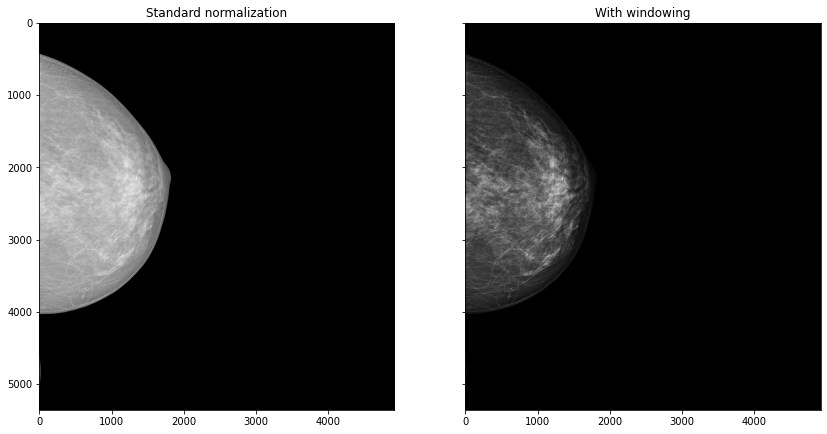

In [5]:
# Plot the images
fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False, sharey=True, figsize=(14, 10))
ax = axes.ravel()
ax[0].set_title(f'Standard normalization')
ax[0].imshow(pixels, cmap='gray');
ax[1].set_title(f'With windowing')
ax[1].imshow(pixels_with_windowing, cmap='gray');

#### - Notice the image on the right looks less "washed out" and the contrast between soft and dense tissue is greater?

In [6]:
# Open another image and take a look
#
file = "/kaggle/input/rsna-breast-cancer-detection/train_images/10050/1428987847.dcm"
pixels = get_pixels(file)
pixels_with_windowing = get_pixels_with_windowing(file)

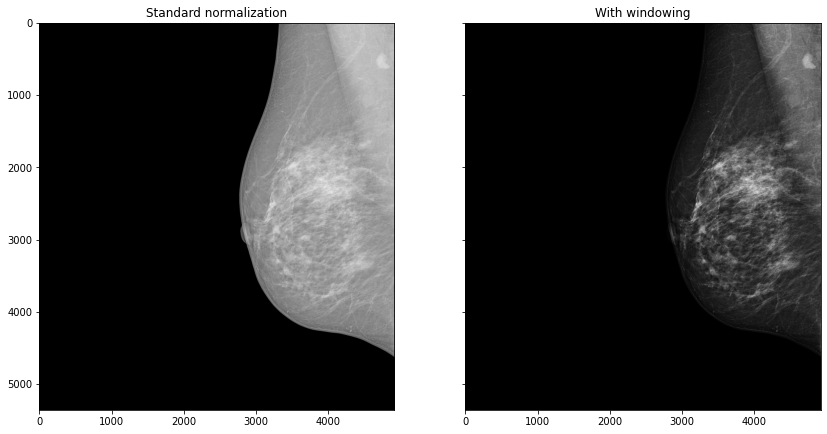

In [7]:
# Plot the images
fig, axes = plt.subplots(nrows=1, ncols=2,sharex=False, sharey=True, figsize=(14, 10))
ax = axes.ravel()
ax[0].set_title(f'Standard normalization')
ax[0].imshow(pixels, cmap='gray');
ax[1].set_title(f'With windowing')
ax[1].imshow(pixels_with_windowing, cmap='gray');

### Conclusion
- Applying windowing to DICOM images provides much better contrast and width of images.
- This technique should be applied to JPG/PNG exports.
- If the pydicom function apply_voi_lut() is used, it will also apply the default WW/WL values if a LUT does not exist .. which they routinely do not exist in mammography.
- Applying windowing allows for greater range when manually adjusting brightness/contrast later.